
# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

I chose the TMDb movie dataset to explore in this project. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

- Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
- There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.




### Question(s) for Analysis
In this project I will be answering two questions 
- Which year has the highest release of movies?
- Which Year Has The Highest Profit Rate?
- Average Runtime Of Movies From Year To Year?
- Which genres are most popular from year to year?





In [10]:
#I'll Use this cell to set up import statements for all of the packages that I
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling
In this section I will be loading the csv file into a DataFrame, drop irrelivant columns, check for missing values and replace and fill them.


### General Properties
Firstly I will use the pd.read_csv() command to load data into DataFrame and then I will use .head() to display first 5 rows of data and then I will use .info() to display basic info about the dataset to figure out if there is missing values.

In [2]:
# Load your data and print out a few lines.
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Perform operations to inspect data
# types and look for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning
1. The first thing I'll do is check for duplicates and drop them.



In [4]:
# check for duplicates
sum(df.duplicated())

1

In [5]:
# drop duplicates
df.drop_duplicates(inplace= True)

2. change release date column to datetime format

In [6]:
# change release date column to datetime format using pandas
df['release_date'] = pd.to_datetime(df['release_date'])

3. remove unused columns that we will not need

    columns like imdb_id, homepage,tagline, overview, budget_adj and revenue_adj are not required for my analysis

In [7]:
# remove unwanted columns using drop function
df.drop(['budget_adj','revenue_adj','overview','tagline','imdb_id','homepage'],axis =1,inplace = True)

4. remove NAN from cast and genres and 0 values from budget and revenue

    

In [8]:
# remove NAN values using isnull function
df = df[df['cast'].isnull() == False]
df = df[df['genres'].isnull() == False]

df = df[df.budget != 0]
df = df[df.revenue != 0]


In [9]:
# Checking for an zero values in the budget and revenue columns
print("Rows With 0 Values In The Budget Column:",df[(df['budget']==0)].shape[0])
print("Rows With 0 Values In The Revenue Column:",df[(df['revenue']==0)].shape[0])

Rows With 0 Values In The Budget Column: 0
Rows With 0 Values In The Revenue Column: 0


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which year has the highest release of movies?)

release_year
2011    199
2012    157
2013    180
2014    165
2015    160
Name: id, dtype: int64


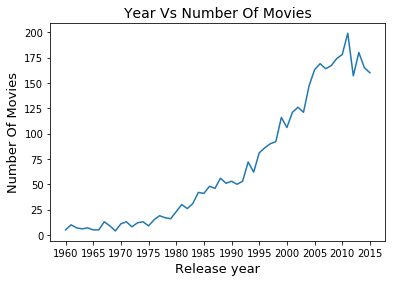

In [11]:
# make group for each year and count the number of movies in each year 
data= df.groupby('release_year').count()['id']
print(data.tail())

#make group of the data according to their release year and count the total number of movies in each year and pot.
df.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))

#set the figure size and labels
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)
#set the style sheet
sns.set_style("whitegrid")

After Seeing the plot and the output we can conclude that year 2011 year has the highest release of movies (199) followed by year 2013 (180) and year 2014 (165).

### Research Question 2  (which year has the highest profit rate?)

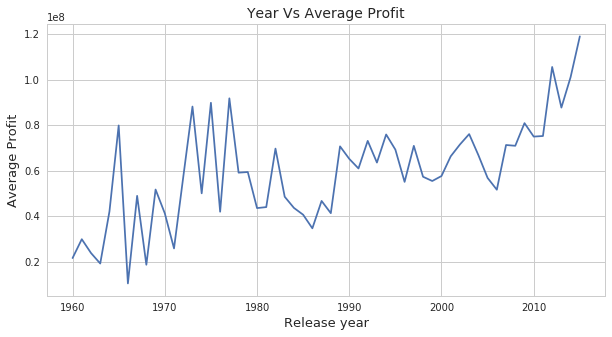

In [13]:
# create profit column
df['profit'] = df['revenue'] - df['budget']
#do year-wise analysis of profit earn by movies in each earn.
#take the average of profit made by movies in each year and plot.
#make the group of the data according to their release_year and find the mean profit and plot.
df.groupby('release_year')['profit'].mean().plot()

#setup the title and labels of the figure.
plt.title("Year Vs Average Profit",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Average Profit',fontsize = 13)

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

According to the plot year 2014-2016 are the most profitable years And the profit was very low between the years 1960 and 1970.

### Research Question 3  (Which Genre Has The Highest Release Of Movies?)

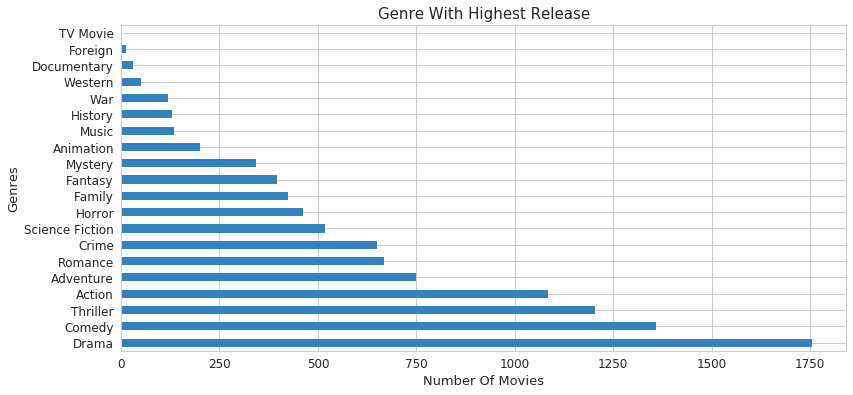

In [14]:
#make a function will will split the string and return the count of each genre.
def count_genre(x):
    #concatenate all the rows of the genrs.
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

#call the function for counting the movies of each genre.
total_genre_movies = count_genre('genres')
#plot a 'barh' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='tab20c')

#setup the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)
sns.set_style("whitegrid")

The plot shows that the genre with the most movies is drama and this shows it has high demand

### Research Question 4  (Which genres are most popular from year to year?)

In [15]:
# map all the rows of genres in a list.
genre_details = list(map(str,(df['genres'])))
genre = ['Adventure', 'Science Fiction', 'Fantasy', 'Crime', 'Western', 'Family','nan', 'Animation','War','Mystery','Romance','TV Movie','Action', 'Thriller','Comedy','Drama' , 'History', 'Music', 'Horror', 'Documentary', 'Foreign']

# make the numpy array of year and popularity which contain all the 
# rows of release_year and popularity column. 
year = np.array(df['release_year'])
popularity = np.array(df['popularity'])

#make a null dataframe which indexs are genres and columns are years.
popularity_df = pd.DataFrame(index = genre, columns = range(1960, 2016))
#change all the values of the dataframe from NAN to zero.
popularity_df = popularity_df.fillna(value = 0.0)

z = 0
for i in genre_details:
    split_genre = list(map(str,i.split('|')))
    popularity_df.loc[split_genre, year[z]] = popularity_df.loc[split_genre, year[z]] + popularity[z]
    z+=1

In [16]:
#calculate the standard deviation for the accurate results.
def calculate_std(x):
    return (x-x.mean())/x.std(ddof=0)

popular_genre = calculate_std(popularity_df)
popular_genre.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Adventure,0.705931,1.437183,2.710171,1.923461,1.022476,1.665470,1.132612,2.442594,2.298155,1.999674,...,0.900711,0.708766,1.142679,1.369903,1.437511,0.922247,1.173951,1.315606,1.641152,1.891133
Science Fiction,-0.717114,-0.762280,-0.623943,-0.750602,-0.911998,-0.781827,0.029983,-0.831207,1.984656,-0.686877,...,-0.259892,-0.373350,0.199341,0.989288,0.032293,0.398418,0.396914,0.805604,1.256819,1.437719
Fantasy,-0.717114,-0.762280,-0.623943,-0.750602,0.307291,-0.781827,-0.732002,-0.715169,-0.711085,-0.686877,...,0.190496,0.584454,0.058617,0.312279,0.306877,0.212083,0.309076,0.008322,0.031096,-0.300706
Crime,-0.717114,-0.177595,-0.068337,-0.750602,-0.505053,-0.781827,-0.732002,0.474892,-0.240488,0.835902,...,0.135996,0.434044,0.489647,-0.470769,-0.067855,0.117937,0.168556,0.500124,-0.327002,0.069980
Western,0.705931,-0.649446,0.084050,-0.750602,-0.911998,-0.781827,0.722680,-0.831207,-0.339560,1.526871,...,-1.012408,-1.033655,-0.985933,-1.070939,-0.919216,-0.898672,-0.789552,-0.952559,-0.907407,-0.697014


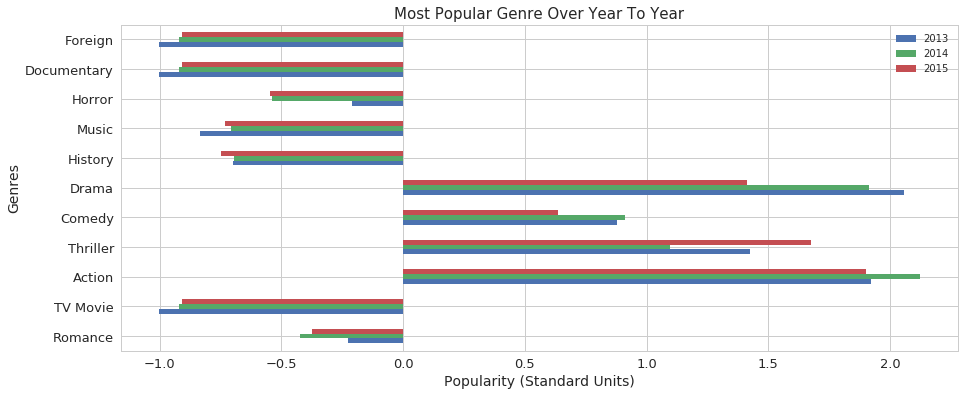

In [18]:
#plot the barh plot of the standardised data.
popular_genre.iloc[10:,53:].plot(kind='barh',figsize = (15,6),fontsize=13)

#setup the title and labels of the plot.
plt.title("Most Popular Genre Over Year To Year",fontsize=15)
plt.xlabel("Popularity (Standard Units)",fontsize=14)
plt.ylabel("Genres",fontsize = 14)
sns.set_style("whitegrid")

We can see that during 2013 drama was the most popular genre and that during 2014 and 2015 action was the most popular genre .

<a id='conclusions'></a>
## Conclusions

- The year with the most movie releases is 2011
- profit was low in the old days and movies now generate more profit
- Drama is the most popular genre, following by action, comedy and thriller.
- We can see that during 2013 drama was the most popular genre and that during 2014 and 2015 action was the most popular genre .

## limitations
- during data cleaning process I filtered out movies with zero values for budgets and revenues so the data for number of movies in a year might me not accurate because maybe a year had more movies just for I removed them.




## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [19]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0